In [1]:
from pathlib import Path
import json

In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("grayscale")

# Results

In [4]:
files = list()
for file in Path("results").glob("*.json"):
    with open(file, "r") as f:
        files.append(json.load(f))

df = pd.json_normalize(files)

In [5]:
df["acc_diff"] = (df["acc_test"] - df["acc_train"]).abs()

In [6]:
df["dataset"].unique()

array(['sonar', 'cred_aus', 'synth_moons', 'heart', 'breast_coimbra',
       'synth_linear', 'cred_ger', 'synth_blobs'], dtype=object)

In [7]:
df.columns

Index(['dataset', 'alpha', 'acc_train', 'acc_test', 'gg_neigh_index',
       'gg_border_perc', 'silhouette_score', 'sil_neg_samples_score',
       'calinski_harabasz_score', 'davies_bouldin_score',
       'orig_gg_neigh_index', 'orig_gg_border_perc', 'orig_silhouette_score',
       'orig_sil_neg_samples_score', 'orig_calinski_harabasz_score',
       'orig_davies_bouldin_score', 'acc_diff'],
      dtype='object')

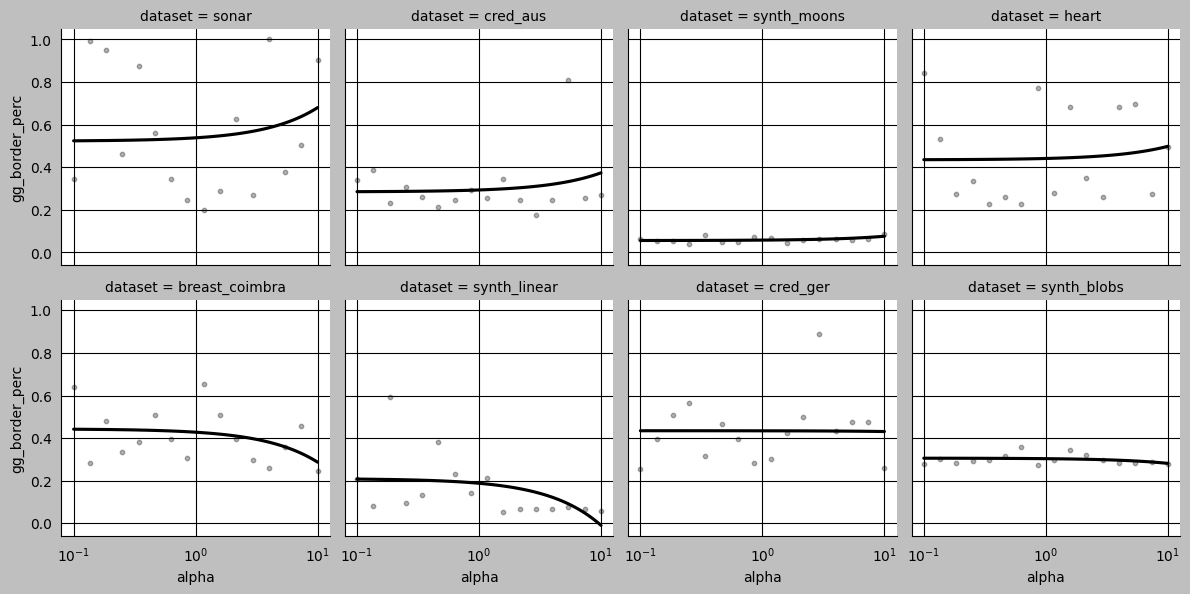

In [8]:
sns.lmplot(
    data=df, x="alpha", y="gg_border_perc", col="dataset",
    col_wrap=4, palette="muted", ci=None,
    height=3, scatter_kws={"s": 10, "alpha": .3},
)
plt.xscale("log")

In [9]:
metrics = [
    "silhouette_score", "sil_neg_samples_score",
    "calinski_harabasz_score", "davies_bouldin_score",
    "gg_neigh_index", "gg_border_perc",
]

In [10]:
aux = list()
for cdt in df["dataset"].unique():
    aux.append(
        df[df["dataset"] == cdt]
        .corr(numeric_only=True)
        [["alpha"]]
        .loc[metrics]
        .reset_index()
        .rename(columns={"index": "metrics"})
        .assign(dataset=cdt)
    )
corrs = pd.concat(aux)

In [11]:
corrs.pivot(columns="dataset", index="metrics", values="alpha")

dataset,breast_coimbra,cred_aus,cred_ger,heart,sonar,synth_blobs,synth_linear,synth_moons
metrics,,,,,,,,
calinski_harabasz_score,0.605926,0.417513,0.311694,-0.001976,-0.285949,0.217304,-0.275159,-0.441483
davies_bouldin_score,-0.319791,-0.338193,0.054614,-0.142038,0.350269,-0.286743,0.430356,0.592427
gg_border_perc,-0.365869,0.182871,-0.007253,0.085018,0.158756,-0.308031,-0.439839,0.452033
gg_neigh_index,0.234439,0.460009,0.010879,-0.102403,-0.329127,0.425527,0.289945,-0.237114
sil_neg_samples_score,-0.348747,-0.483071,0.019264,-0.071114,0.339133,0.273616,-0.472675,0.292394
silhouette_score,0.410023,0.396661,0.155514,0.123635,-0.334421,0.173563,-0.412630,-0.614267


In [12]:
df.corr(numeric_only=True)[["alpha"]].loc[metrics]

,alpha
silhouette_score,0.013322
sil_neg_samples_score,-0.017895
calinski_harabasz_score,-0.037735
davies_bouldin_score,0.031292
gg_neigh_index,0.020912
gg_border_perc,-0.011902


---